# Анализ сервиса аренды самокатов 

# Общая информация о проектной работе

Мы анализируем популярный сервис аренды самокатов **GoFast**. Имеются данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим  гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса **GoFast** пользуются мобильным приложением. Сервисом можно пользоваться:

- без подписки
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — **8** рублей;
  - стоимость старта (начала поездки) — **50** рублей;
- с подпиской **Ultra**
  - абонентская плата — **199** рублей в месяц;
  - стоимость одной минуты поездки — **6** рублей;
  - стоимость старта — бесплатно.

**Шаг 1. Загрузка данных**

1.1 Загружаем CSV-файлы с данными с помощью библиотеки pandas и сохраняем их в датафреймы. Пути к файлам:

/datasets/users_go.csv
/datasets/rides_go.csv
/datasets/subscriptions_go.csv
1.2 Выводим первые строки каждого набора данных и изучаем общую информацию о каждом датафрейме.

**Шаг 2. Предобработка данных**

2.1 Приводим столбец date к типу даты в pandas.

2.2 Добавляем новый столбец с номером месяца на основе столбца date.

2.3 Проверяем датафреймы на наличие пропущенных значений и дубликатов и обрабатываем их при необходимости.

**Шаг 3. Исследовательский анализ данных**

Описываем и визуализируем информацию о пользователях и поездках:

3.1 Частота встречаемости городов.

3.2 Соотношение пользователей с подпиской и без подписки.

3.3 Возраст пользователей.

3.4 Расстояние, которое пользователи преодолевают за одну поездку.

3.5 Продолжительность поездок.

**Шаг 4. Объединение данных**

4.1 Объединяем данные о пользователях, поездках и подписках в один датафрейм с помощью метода merge().

4.2 Создаем два новых датафрейма из объединенного датафрейма:

данные о пользователях без подписки;
данные о пользователях с подпиской.
4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

**Шаг 5. Подсчёт выручки**

5.1 Создаем датафрейм с агрегированными данными о поездках, подсчитывая суммарное расстояние, количество поездок и суммарное время для каждого пользователя по месяцам.

5.2 Добавляем в этот датафрейм столбец с помесячной выручкой от каждого пользователя, используя информацию об условиях оплаты для подписчиков и пользователей без подписки. Округляем продолжительность каждой поездки до следующего целого числа для расчета стоимости (например, 25.3, 25.5 и 26.0 округляем до 26).

**Шаг 6. Проверка гипотез**

Продакт-менеджеры хотят увеличить количество пользователей с подпиской. Для этого нужно исследовать следующие моменты:

6.1 Тратят ли пользователи с подпиской больше времени на поездки? Проверим эту гипотезу, используя данные о продолжительности каждой сессии для подписчиков и пользователей без подписки.

6.2 Является ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, менее 3130 метров? Проверим эту гипотезу и сделаем выводы.

6.3 Сравним помесячную выручку от пользователей с подпиской и без подписки, чтобы выяснить, выше ли доход от подписчиков.

6.4 Представим, что после обновления серверов компании количество обращений в техподдержку снизилось. Определим, какой тест нужен для проверки этой гипотезы.

**Шаг 7 (необязательное задание). Распределения**

7.1 Определим минимальное количество промокодов для рассылки, чтобы с вероятностью 5% или ниже достичь цели в 100 продленных подписок после пробного периода (при условии, что 10% пользователей продлевают подписку). Подберем параметры распределения, построим график и ответим на вопрос о количестве промокодов.

7.2 Отдел маркетинга планирует рассылку 1 млн push-уведомлений, из которых открывают около 40%. Построим график распределения с помощью аппроксимации и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.



In [1]:
# Загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats as st
from scipy.stats import binom, poisson, norm

# 1. Загрузка данных

In [2]:
# Загрузка датасет
try:
    users_go = pd.read_csv('/datasets/users_go.csv') 
    rides_go = pd.read_csv('/datasets/rides_go.csv') 
    subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv') 
except:
    users_go = pd.read_csv('datasets/users_go.csv') 
    rides_go = pd.read_csv('datasets/rides_go.csv') 
    subscriptions_go = pd.read_csv('datasets/subscriptions_go.csv') 

In [3]:
# Функция выдачи информации о датаседе
def dataset_information(dataset):
    print()
    print(dataset.info())
    print()
    display(dataset.hist(color='orange',edgecolor='Black',alpha=0.7));
    print()
    display(dataset.head(10))
    print()
    display(dataset.describe())
    print('\033[1m' + 'Проверка датафрейма на наличие явных дубликатов. Их количество:' + '\033[0m')
    display(dataset.duplicated().sum())
    print()
    print('\033[1m' + 'Доля пропущенных значений среди всех данных:' + '\033[0m')
    display(dataset.isna().mean())
    print()
    print('\033[1m' + 'Проверка датафрейма на наличие  null. Результат в виде True/False:' + '\033[0m')
    display(dataset.isnull().values.any())
    

## Датафрейм 'Пользователи' (users_go)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None



array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


Проверка датафрейма на наличие явных дубликатов. Их количество:


31


Доля пропущенных значений среди всех данных:


user_id              0.0
name                 0.0
age                  0.0
city                 0.0
subscription_type    0.0
dtype: float64


Проверка датафрейма на наличие  null. Результат в виде True/False:


False

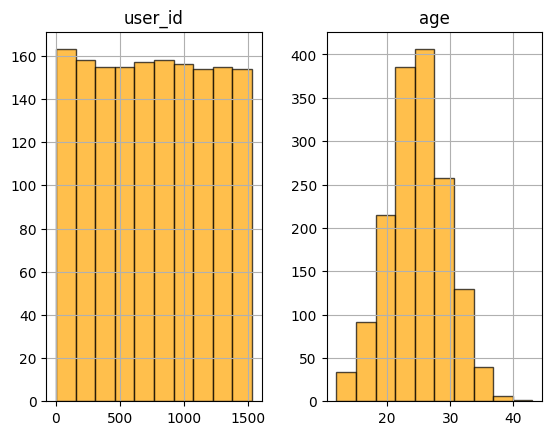

In [4]:
dataset_information(users_go)

## Датафрейм 'Поездки' (rides_go)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None



array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'distance'}>],
       [<AxesSubplot:title={'center':'duration'}>, <AxesSubplot:>]],
      dtype=object)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


Проверка датафрейма на наличие явных дубликатов. Их количество:


0


Доля пропущенных значений среди всех данных:


user_id     0.0
distance    0.0
duration    0.0
date        0.0
dtype: float64


Проверка датафрейма на наличие  null. Результат в виде True/False:


False

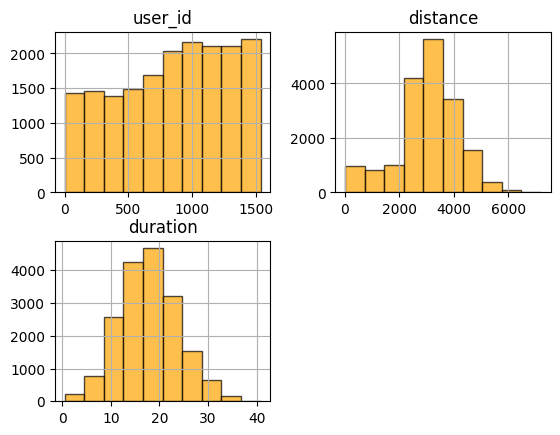

In [5]:
dataset_information(rides_go)

## Датафрейм 'Подписки' (subscriptions_go)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None



array([[<AxesSubplot:title={'center':'minute_price'}>,
        <AxesSubplot:title={'center':'start_ride_price'}>],
       [<AxesSubplot:title={'center':'subscription_fee'}>,
        <AxesSubplot:>]], dtype=object)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


Проверка датафрейма на наличие явных дубликатов. Их количество:


0


Доля пропущенных значений среди всех данных:


subscription_type    0.0
minute_price         0.0
start_ride_price     0.0
subscription_fee     0.0
dtype: float64


Проверка датафрейма на наличие  null. Результат в виде True/False:


False

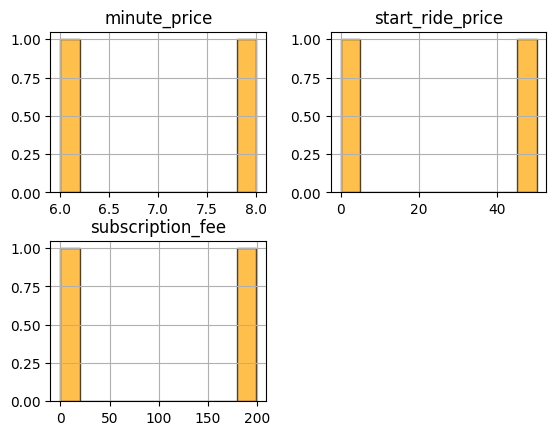

In [6]:
dataset_information(subscriptions_go)

## Вывод:

1. `users_go`:
   - В датафрейме находится **1565** строк.
   - Столбцы названы корректно.
   - Типы данных в столбце `user_id` можно изменить на облегченный.
   - В датафрейме обнаружен **31** дубликат строк. Пропущенных и `null` значений не найдено.
2. `rides_go`:
   - В датафрейме находится **18068** строк.
   - Столбцы названы корректно
   - Столбец `date` формата `object`, вместо необходимого `datetime`
   - Числовые столбцы можно изменить на более облегченные.
   - В датафрейме не обнаруженны дубликаты строк, пропущенные и `null` значения.
3. `subscriptions_go`:
   - В датафрейме находится **2** строки.
   - Столбцы названы корректно.
   - Числовые столбцы можно изменить на более облегченные.
   - В датафрейме не обнаруженны дубликаты строк, пропущенные и `null` значения.
   

# 2. Предобработка данных

## Предобработка датафрейма 'Пользователи'

In [7]:
# В датафрейме обнаружены 31 дубликаты - изучим их
users_go['user_id'].duplicated().sum()

# Найдем дубликаты
duplicate_rows = users_go[users_go.duplicated ()]

# Просмотрим дубликаты
duplicate_rows.sort_values(by='user_id').reset_index(drop=True)

,user_id,name,age,city,subscription_type
0,16,Амалия,27,Краснодар,ultra
1,43,Стефания,22,Омск,ultra
2,47,Юрий,28,Тюмень,ultra
3,72,Никита,25,Москва,ultra
4,108,Влада,29,Тюмень,ultra
5,121,Алина,25,Пятигорск,ultra
6,127,Павел,25,Пятигорск,ultra
7,136,Марсель,25,Тюмень,ultra
8,153,Герман,23,Москва,ultra
9,204,Руслан,30,Пятигорск,ultra


In [8]:
# Удалим дубликаты
users_go.drop_duplicates(subset=['user_id'], inplace=True)

# Проверим повторно на наличие дубликатов
users_go['user_id'].duplicated().sum()

0

In [9]:
# приведем формат столбцотв 'user_id' и 'age' в более легкий, учитывая размах числовых значений

users_go['user_id'] = users_go['user_id'].astype('uint16')
users_go['age'] = users_go['age'].astype('uint8')

# Проверим датафрейм учитывая изменения

rides_go.info()
rides_go.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [10]:
# Изучим список городов
print(users_go['city'].value_counts())

# На будущее можно создать сводную таблицу состоящую из списка городов и количества строк с ними
users_city = users_go.pivot_table(values='user_id', index='city', aggfunc={'user_id': 'count'}).sort_values(by='user_id', ascending=False)
users_city.columns = ['amount']
users_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


,amount
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


## Предобработка датафрейма 'Поездки'

In [11]:
# Округлим данные в столбце distance до дробных с двумя знаками после запятой
rides_go['distance'] = rides_go['distance'].round(2)

# Округлим данные в столбце duration вверх до целых чисел
rides_go['duration'] = np.ceil(rides_go['duration']).astype('int')

# приведем дату в правильный формат
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

# создадим столбец `month` на основе столбца `date`
rides_go['month'] = rides_go['date'].dt.month.astype('uint8')

In [12]:
# приведем формат столбцов 'user_id' и 'duration' в более легкий, учитывая размах числовых значений
rides_go['user_id'] = rides_go['user_id'].astype('uint16')
rides_go['duration'] = rides_go['duration'].astype('uint16')

In [13]:
# Проверим датафрейм учитывая изменения

rides_go.info()
rides_go.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  uint16        
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  uint16        
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  uint8         
dtypes: datetime64[ns](1), float64(1), uint16(2), uint8(1)
memory usage: 370.7 KB


,user_id,distance,duration,date,month
0,1,4409.92,26,2021-01-01,1
1,1,2617.59,16,2021-01-18,1
2,1,754.16,7,2021-04-20,4
3,1,2694.78,19,2021-08-11,8
4,1,4028.69,27,2021-08-28,8
5,1,2770.89,17,2021-10-09,10
6,1,3039.02,15,2021-10-19,10
7,1,2842.12,24,2021-11-06,11
8,1,3412.69,16,2021-11-14,11
9,1,748.69,16,2021-11-22,11


## Предобработка датафрейма 'Подписки'

In [14]:
# приведем формат столбцов 'minute_price', 'start_ride_price', 'subscription_fee' в более легкий
# учитывая размах числовых значений

subscriptions_go['minute_price'] = subscriptions_go['minute_price'].astype('uint8')
subscriptions_go['start_ride_price'] = subscriptions_go['start_ride_price'].astype('uint8')
subscriptions_go['subscription_fee'] = subscriptions_go['subscription_fee'].astype('uint16')

# Проверим датафрейм учитывая изменения

subscriptions_go.info()
subscriptions_go.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      uint8 
 2   start_ride_price   2 non-null      uint8 
 3   subscription_fee   2 non-null      uint16
dtypes: object(1), uint16(1), uint8(2)
memory usage: 152.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


## Вывод:
1. По датафрейму `users_go`:
    - удалены дубликаты
    - формат столбца `user_id` переведен в формат `uint16`
    - формат столбца `age` переведен в формат `uint8`
    - создана сводная таблица `users_city` с данными о городах и количестве их использований
2. По датафрейму `rides_go`:
    - округлены данные по столбцу `distance` до двух знаков после запятой
    - округлены данные по столбцу `duration` до целых вверх и переведен в формат `uint16`
    - столбец `duration` переведен в формат `int` и переведен в формат `uint16`
    - создан столбец `month` с номерами месяцев в формате `uint8`
    - столбец `date` переведен в корректный формат `datetime`
3. По датафрейму `subscriptions`:
    - столбец `minute_price` переведен в формат `uint8`
    - столбец `start_ride_price` переведен в формат `uint8`
    - столбец `subscription_fee` переведен в формат `uint16`

# 3. Исследовательский анализ данных

## Исследование по списку параметров каждого датафрейма

1. `users_go`:
   - Возраст пользователей
   - Частота встречаемости городов
   - Соотношение пользователей с подпиской и без подписки
2. `rides_go`:
   - Расстояние за одну поездку
   - Длительность поездки

## 3.1 Датафрейм 'Пользователи' - Возраст пользователей

In [15]:
# Рассмотрим столбец возраста пользователей
users_go.groupby('age')['user_id'].count()

age
12      4
13      8
14      9
15     13
16     19
17     26
18     46
19     47
20     71
21     93
22    119
23    129
24    132
25    145
26    131
27    119
28    112
29     68
30     68
31     48
32     41
33     39
34     19
35     15
36      6
37      2
38      3
39      1
43      1
Name: user_id, dtype: int64

In [16]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Текущая описательная статистика для столбца возраста выглядит хорошо, выбросы отсутствуют.

- Средний возраст и медианное значение пользователей 25 лет. Эта информация говорит о том, что распределение пользователей близко к нормальному, или, по крайней мере, не сильно смещено в одну из сторон. Также это подтверждает отсутствие значительных выбросов в данных.
- В данном случае стандартное отклонение 4.6 среднее. Данные имеют некоторый разброс, но не слишком большой.

Можно построить гистограмму распределения возраста и ящик с усами, чтобы увидеть более подробную информацию о столбце:

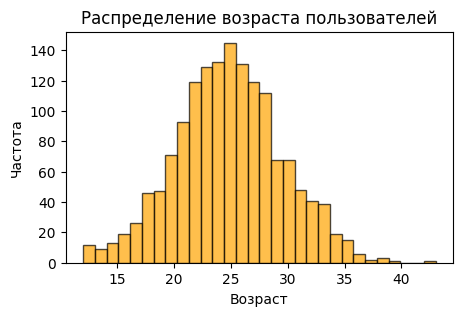

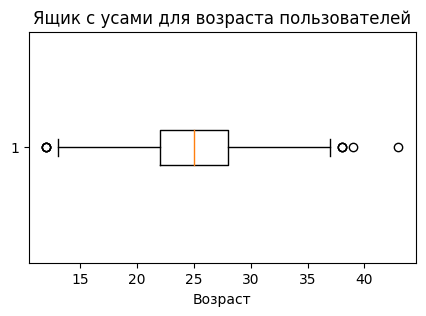

In [17]:
# Гистограмма распределения возраста
plt.figure(figsize=(5, 3))
plt.hist(users_go['age'], bins=30, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста пользователей')
plt.show()

# Ящик с усами
plt.figure(figsize=(5, 3))
plt.boxplot(users_go['age'], vert=False)
plt.xlabel('Возраст')
plt.title('Ящик с усами для возраста пользователей')
plt.show()

Исходя из гистограммы распределения возраста пользователей, можно сделать вывод, что перед нами нормальное распределение данных.

## 3.2 Датафрейм 'Пользователи' - Частота встречаемости городов

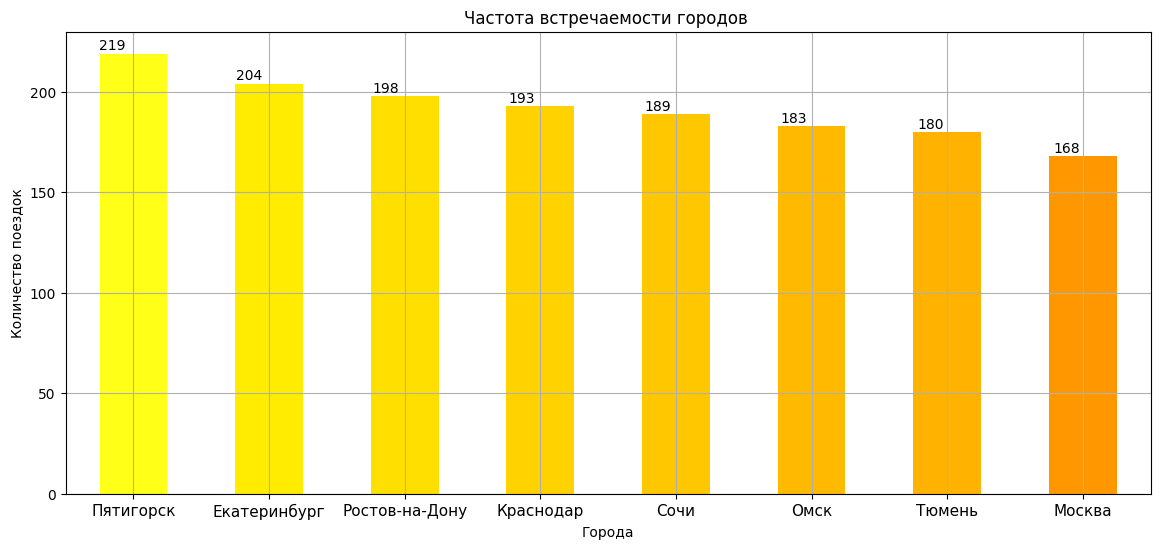

,amount
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


In [18]:
# создадим столбчатую диаграмму

colors = plt.cm.hot(users_city['amount'] / max(users_city['amount'])/1.3)

ax = users_city['amount'].plot(
    kind='bar',
    figsize=(14, 6),
    grid=True,
    color=colors
)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

#plt.bar(range(len(users_city['amount'])), users_city['amount'], color=colors)
plt.title('Частота встречаемости городов ')
plt.xlabel('Города')
plt.ylabel('Количество поездок')
plt.xticks(range(len(users_city['amount'])), users_city['amount'].index,fontsize=11, rotation=0) 
plt.show()

# выведем таблицу города/частота встречаемости
users_city

Больше всего поездок в Пятигорске, а в Москве меньше всего.

## 3.3 Датафрейм 'Пользователи' - Соотношение пользователей с подпиской и без подписки

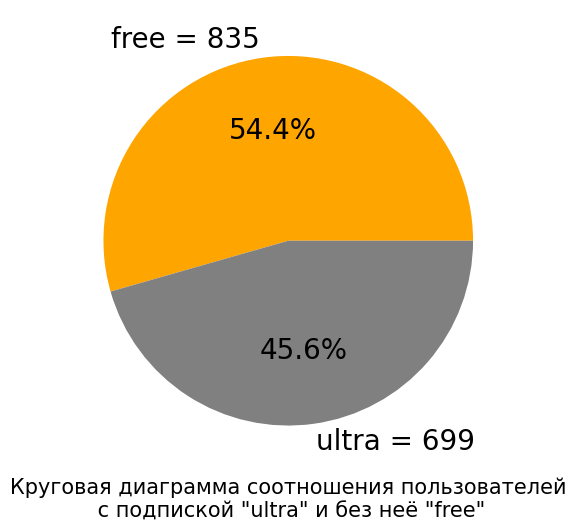

,type,amount,type_amount,percentage
0,free,835,free = 835,54.4
1,ultra,699,ultra = 699,45.6


In [19]:
users_compare = users_go.pivot_table(index = 'subscription_type', values = 'user_id', aggfunc = 'count').reset_index()
users_compare['type_amount'] = users_compare['subscription_type'] + ' = ' + users_compare['user_id'].astype(str)
users_compare.columns = ['type', 'amount', 'type_amount']
users_compare['percentage'] = round(users_compare['amount'] / (users_compare['amount'].sum() / 100), 1)


# создание круговой диаграммы с помощью .plot Pandas
users_compare['amount'].plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['orange', 'grey'],
    labels=users_compare['type_amount'],
    subplots=True,
    figsize=(6,6),
    fontsize=20
)

plt.ylabel('')
plt.xlabel(f'Круговая диаграмма соотношения пользователей\n с подпиской "ultra" и без неё "free"', fontsize=15)
plt.show()

users_compare

Пользователей не имеющих подписку больше, чем пользователей Ultra на **8.87%**

## 3.4 Датафрейм 'Поездки' - Расстояние, которое пользователь преодолел за одну поездку

In [20]:
# Рассмотрим столбец 'distance'

rides_go['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

In [21]:
# Для более удобной визуализации данных создадим столбец расстояния в км. 'distance_km'

rides_go['distance_km'] = round(rides_go['distance']/1000, 3)

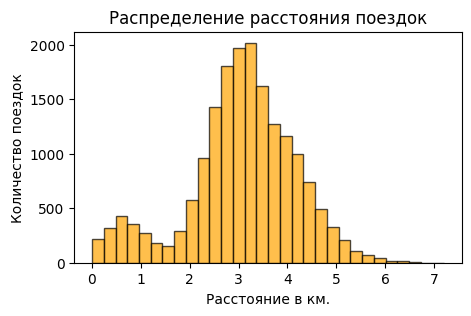

In [22]:
# Гистограмма распределения расстояния
plt.figure(figsize=(5, 3))
plt.hist(
    rides_go['distance_km'], 
    bins=30, 
    color='orange', 
    edgecolor='black',
    alpha=0.7
)
plt.xlabel('Расстояние в км.')
plt.ylabel('Количество поездок')
plt.title('Распределение расстояния поездок')
plt.show()

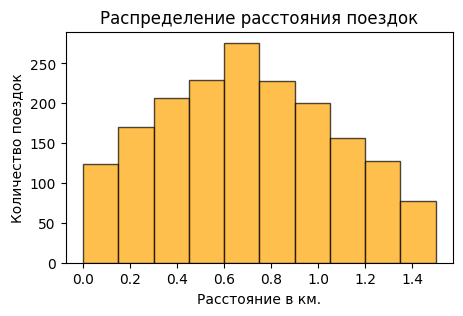

In [23]:
# Гистограмма распределения расстояния отрезка от 0 до 1.5 км
filtered_rides = rides_go[(rides_go['distance_km'] >=0) & (rides_go['distance_km'] <= 1.5)]

plt.figure(figsize=(5, 3))
plt.hist(
    filtered_rides['distance_km'], 
    bins=10, 
    color='orange', 
    edgecolor='black',
    alpha=0.7
)
plt.xlabel('Расстояние в км.')
plt.ylabel('Количество поездок')
plt.title('Распределение расстояния поездок')
plt.show()

Изучив первоначальную гистограмму с неотфильтрованными данными мы видим всплеск в левой её части.
Мы создали отфильтрованную таблиццу, в которой учтены поездки расстоянием от 0 по 1.5 км.

Перед нам есть отдельное от основного нормальное распределнеие, которое может говорить о том, что некоторые поездки на самокатах брались с немного другой целью - например поездки от офиса до ближайшего магазина/кафе или же до метро. Для таких случаев нет необходимости в длительных поездках.


In [24]:
filtered_rides['distance'].describe()

count    1796.000000
mean      703.889722
std       368.353620
min         0.860000
25%       414.315000
50%       687.535000
75%       985.435000
max      1499.570000
Name: distance, dtype: float64

Описательная статистика левого распредления говорит о том, что в среднем такие маленькие поездки занимают ~700 метров, а межквантильный размах достигает 571 метр.


Исходя из первоначальной гистограммы и описательный статистики видно, что в среднем поездка занимает 3 км. Об этом же говорит и медиана распределения.
Максимальные поездки достигают 7 км, а минимальная была всего 86 метров.

## 3.5 Датафрейм 'Поездки' - Продолжительность поездок

In [25]:
# Рассмотрим столбец 'duration'

rides_go.groupby('duration')['user_id'].count()

duration
1       95
3       33
4       55
5       95
6      143
7      185
8      234
9      330
10     469
11     638
12     742
13     923
14     991
15    1080
16    1119
17    1095
18    1190
19    1198
20    1119
21    1122
22     958
23     815
24     684
25     561
26     498
27     397
28     288
29     271
30     197
31     164
32     137
33      96
34      71
35      47
36      14
37       7
38       1
39       3
40       2
41       1
Name: user_id, dtype: int64

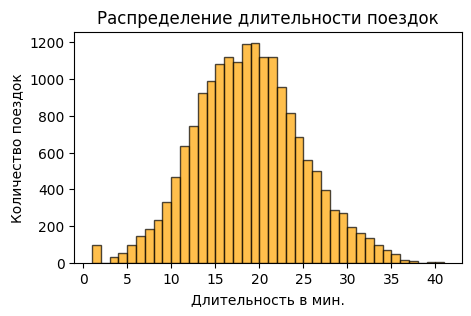

In [26]:
# Гистограмма распределения длительности
plt.figure(figsize=(5, 3))
plt.hist(rides_go['duration'], bins=40, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Длительность в мин.')
plt.ylabel('Количество поездок')
plt.title('Распределение длительности поездок')
plt.show()


In [27]:
rides_go['duration'].describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

Исходя из полученной гистограммы, можно подвести итог, что пользователь самоката в среднем тратит на поездку 18 минут. Медиана распределения также находится на значении в 18 минут. Распределение длительности поездок нормальное.
Бывают короткие поездки - длиной в минуту, а также поездки длительностью до 41 минуты.

## Вывод:

Возрастные путешествия:
 - Средний возраст пассажиров составляет 25 лет. Люди в возрасте, а в данном случае старше 45 лет, предпочитают обходить самокаты стороной.
 - Стандартное отклонение 4.6 года. Данные разнообразны, но не слишком далеки от среднего. Все в пределах нормы!

Города и поездки:
 - Пятигорск - самый частый по количеству поездок на самокате город. Судя по всему, дороги и тротуары там приведены в порядок, и самокаты GoFast там самые популярные.
 - В Москве, на удивление, самое маленькое количество поездок. Смею предположить, что в Москве имеется больше фирм-прокатчиков самокатов, из-за этого у людей появляется больше возможности выбора.

Подписка против Бесплатной поездки:
 - Пользователей без подписки больше чем пользователей с подпиской на 8.87%. Вероятно мы скоро узнаем, кто же в итоге затрачивает денег больше, а кто меньше.

Путешествия на расстояния:
 - В среднем поездка составляет 3 км. Это как прогулка до ближайшего кафе – не слишком далеко, но и не на углу.
 - Максимальные поездки – 7 км. Это как марафон для самоката!
 - Минимальная поездка – всего 86 метров. Это как перепрыгнуть через большую лужу :)

Длительность путешествий:
 - В среднем пассажир проводит на самокате 18 минут. Медиана говорит о том же. Кстати, это как серия мультфильма - только смотреть его катаясь на самокате я бы не рекомендовал. 
 - Есть и экстремальные поездки – до 41 минуты. Лишь бы голова не закружилась.

# 4. Объединение данных

## 4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [28]:
# объединим три таблицы в одну методом 'merge'
merged_go = rides_go.copy()
merged_go = merged_go.merge(users_go, how = 'left', on = 'user_id' )
merged_go = merged_go.merge(subscriptions_go, how = 'left', on='subscription_type')

# отображение таблицы
display(merged_go)

,user_id,distance,duration,date,month,distance_km,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.92,26,2021-01-01,1,4.410,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.59,16,2021-01-18,1,2.618,Кира,22,Тюмень,ultra,6,0,199
2,1,754.16,7,2021-04-20,4,0.754,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.78,19,2021-08-11,8,2.695,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.69,27,2021-08-28,8,4.029,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.10,20,2021-11-04,11,3.781,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.42,22,2021-11-16,11,2.840,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.19,19,2021-11-18,11,3.826,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.31,17,2021-11-27,11,2.902,Альберт,25,Краснодар,free,8,50,0


In [29]:
# вывод информации о таблице
merged_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  uint16        
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  uint16        
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  uint8         
 5   distance_km        18068 non-null  float64       
 6   name               18068 non-null  object        
 7   age                18068 non-null  uint8         
 8   city               18068 non-null  object        
 9   subscription_type  18068 non-null  object        
 10  minute_price       18068 non-null  uint8         
 11  start_ride_price   18068 non-null  uint8         
 12  subscription_fee   18068 non-null  uint16        
dtypes: datetime64[ns](1), float64(2), object(3), uint16(3), uint8

Для того, чтобы удостовериться в корректности объединения данных, необходимо выполнить несколько дополнительных шагов:
1. Проверка на потерю данных
2. Проверка на появление лишних записей
3. Проверка на пропуски
4. Проверка на дубликаты

In [30]:
# проверка на потерю данных
if len(rides_go) != len(merged_go):
    print(f'1. Часть строк была пропущена. Количество строк: {len(merged_go) - len(rides_go)}')
else:
    print('1. Потерянные строки отсутствуют')
    
# проверка на появление лишних записей
if len(rides_go) < len(merged_go):
    print(f'2. Лишние строки добавлены в объединенную таблицу. Их количество: {len(merged_go) - len(rides_go)}')
else:
    print('2. Лишние строки отсутствуют')

# проверка на пропуски
if np.sum(merged_go.isnull().values) > 0:
    print(f'3. Есть пропущенные значения в объединенной таблице. Их количество: {merged_go.isnull()}')
else:
    print('3. Пропущенные значения отсутствуют')
    
# проверка на дубликаты
if merged_go.duplicated().sum() > 0:
    print(f'4. Есть явные дубликаты в объединенной таблице. Их количество: {merged_go.duplicated().sum()}')
else:
    print('4. Явные дубликаты отсутствуют')

1. Потерянные строки отсутствуют
2. Лишние строки отсутствуют
3. Пропущенные значения отсутствуют
4. Явные дубликаты отсутствуют


## 4.2 Создание датафреймов с пользователями без подписки, с подпиской.

Датафрейм с данными о пользователях без подписки:

In [31]:
# объединение таблиц с помощью поиска по значению 'free'
merged_free = merged_go[merged_go['subscription_type'] == 'free']

display(merged_free)

print('Количество строк в датафрейме merged_without:', merged_free['user_id'].count())

,user_id,distance,duration,date,month,distance_km,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.69,15,2021-01-02,1,2.516,Айдар,22,Омск,free,8,50,0
6501,700,846.93,17,2021-02-01,2,0.847,Айдар,22,Омск,free,8,50,0
6502,700,4004.43,21,2021-02-04,2,4.004,Айдар,22,Омск,free,8,50,0
6503,700,1205.91,10,2021-02-10,2,1.206,Айдар,22,Омск,free,8,50,0
6504,700,3047.38,18,2021-02-14,2,3.047,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.10,20,2021-11-04,11,3.781,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.42,22,2021-11-16,11,2.840,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.19,19,2021-11-18,11,3.826,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.31,17,2021-11-27,11,2.902,Альберт,25,Краснодар,free,8,50,0


Количество строк в датафрейме merged_without: 11568


In [32]:
# рассмотрим статистические данные таблицы free
merged_free.describe()

,user_id,distance,duration,month,distance_km,age,minute_price,start_ride_price,subscription_fee
count,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.000000,11568.0,11568.0,11568.0
mean,1120.527230,3045.495284,17.890992,6.522994,3.045496,24.893326,8.0,50.0,0.0
std,241.165628,1246.173810,6.330250,3.449770,1.246175,4.481100,0.0,0.0,0.0
min,700.000000,0.860000,1.000000,1.000000,0.001000,12.000000,8.0,50.0,0.0
25%,915.000000,2366.560000,13.000000,4.000000,2.367000,22.000000,8.0,50.0,0.0
50%,1123.000000,3114.650000,18.000000,7.000000,3.115000,25.000000,8.0,50.0,0.0
75%,1328.000000,3905.695000,22.000000,9.000000,3.906000,28.000000,8.0,50.0,0.0
max,1534.000000,7211.010000,35.000000,12.000000,7.211000,43.000000,8.0,50.0,0.0


Датафрейм с данными о пользователях с подпиской:

In [33]:
# объединение таблиц с помощью поиска по значению 'ultra'
merged_ultra = merged_go[merged_go['subscription_type'] == 'ultra']

# отобразить таблицу
display(merged_ultra)

print('Количество строк в датафрейме merged_without:', merged_ultra['user_id'].count())

,user_id,distance,duration,date,month,distance_km,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.92,26,2021-01-01,1,4.410,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.59,16,2021-01-18,1,2.618,Кира,22,Тюмень,ultra,6,0,199
2,1,754.16,7,2021-04-20,4,0.754,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.78,19,2021-08-11,8,2.695,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.69,27,2021-08-28,8,4.029,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,3973.05,25,2021-08-29,8,3.973,Оксана,22,Москва,ultra,6,0,199
6496,699,3288.70,16,2021-09-12,9,3.289,Оксана,22,Москва,ultra,6,0,199
6497,699,3076.16,15,2021-09-26,9,3.076,Оксана,22,Москва,ultra,6,0,199
6498,699,4707.85,16,2021-10-17,10,4.708,Оксана,22,Москва,ultra,6,0,199


Количество строк в датафрейме merged_without: 6500


In [34]:
# рассмотрим статистические данные таблицы ultra

merged_ultra.describe()

,user_id,distance,duration,month,distance_km,age,minute_price,start_ride_price,subscription_fee
count,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.0,6500.0,6500.0
mean,348.725385,3115.445431,19.037692,6.422308,3.115444,24.892615,6.0,0.0,199.0
std,201.099339,836.895369,5.577439,3.414616,0.836900,4.757208,0.0,0.0,0.0
min,1.000000,244.210000,4.000000,1.000000,0.244000,12.000000,6.0,0.0,199.0
25%,175.000000,2785.447500,15.000000,4.000000,2.785000,22.000000,6.0,0.0,199.0
50%,351.000000,3148.640000,19.000000,6.000000,3.149000,25.000000,6.0,0.0,199.0
75%,525.000000,3560.577500,22.000000,9.000000,3.561000,28.000000,6.0,0.0,199.0
max,699.000000,5699.770000,41.000000,12.000000,5.700000,38.000000,6.0,0.0,199.0


1. Дистанция.
   - Среднее и медианное значение по пользователям без подписки - 3.0 км и 3.1 км
   - Среднее и медианной значение по пользователям с подпиской - 3.1 км и 3.1 км
   - Можно сказать, что в среднем пользователи и с подпиской и без подписки ездят одинаково
   - Межквантильный размах по пользователям без подписки - (3560 - 2785) = 775 метров
   - Межквантильный размах по пользователям с подпиской - (3905 - 2366) = 1539 метров
   - Разница в 764 метра в размахе указывает на более разнообразные поездки среди пользователей с подпиской. Также на это влияет меньшая стоимость минут поездки.
   - Максимальное расстояние по пользователям без подписки - 5.7 км
   - Максимальное расстояние по пользователям с подпиской - 7.2 км
   - Эта информация снова может говорить о том, что причиной большего растояния может быть меньшая стоимость поездки за минуту.
2. Длительность.
   - Среднее и медианное значение по пользователям без подписки - 18 минут
   - Среднее и медианной значение по пользователям с подпиской - 19 минут
   - В среднем пользователи с подпиской ездят больше на минуту, чем пользователи без подписки
   - Межквантильный размах по пользователям без подписки - (22 - 13) = 9 минут
   - Межквантильный размах по пользователям с подпиской - (22 - 15) = 7 минут
   - Эта информация говорит о том, что пользователи с подпиской проводят на самокате больше времени (при первом квантиле в 15 минут в сравнении с 13 минутами) чем пользователи без подписки.
   - Максимальная длительность поездки пользователей без подписки - 35 км
   - Максимальная длительность поездки пользователей с подпиской - 41 км
   - Пользователи с подпиской любят более длительные поездки
   

## Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

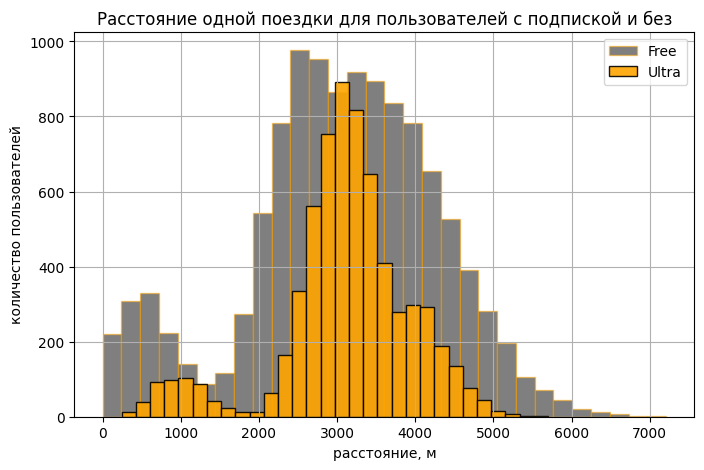

In [35]:
x1 = merged_free['distance'].plot(
    kind = 'hist', 
    figsize = (8,5), 
    bins = 30, 
    label='Free',
    color='Black',
    edgecolor='orange',
    alpha=0.5
)

x2 = merged_ultra['distance'].plot(
    kind = 'hist', 
    figsize = (8,5), 
    bins = 30, 
    label='Ultra',
    color='orange',
    edgecolor='Black',
    alpha=0.9
)
plt.grid(True)
plt.title('Расстояние одной поездки для пользователей с подпиской и без')
plt.xlabel('расстояние, м')
plt.ylabel('количество пользователей')
plt.legend(loc='upper right')
plt.show()

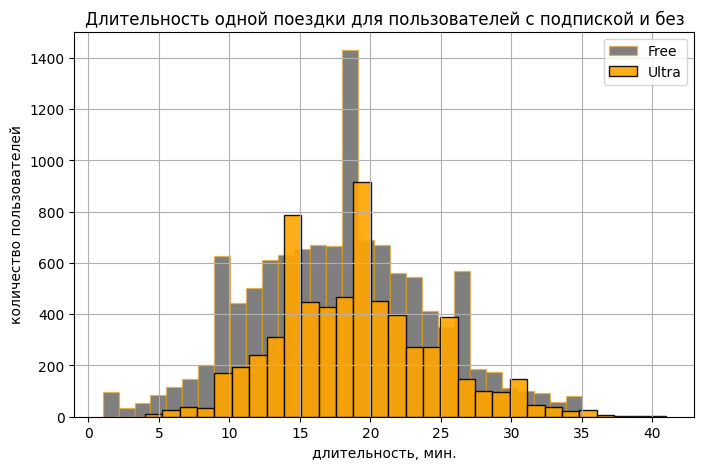

In [36]:
x1 = merged_free['duration'].plot(
    kind = 'hist', 
    figsize = (8,5), 
    bins = 30, 
    label='Free',
    color='Black',
    edgecolor='orange',
    alpha=0.5
)

x2 = merged_ultra['duration'].plot(
    kind = 'hist', 
    figsize = (8,5), 
    bins = 30, 
    label='Ultra',
    color='orange',
    edgecolor='Black',
    alpha=0.9
)
plt.grid(True)
plt.title('Длительность одной поездки для пользователей с подпиской и без')
plt.xlabel('длительность, мин.')
plt.ylabel('количество пользователей')
plt.legend(loc='upper right')
plt.show()

## Вывод:

Обе гистограммы нам говорят о том, что в обоих таблицах с данными с подпиской и без подписки, распределения в данных о дистанции и длительности близки к нормальным.

Поездок с использованием подписки 'ultra' на 5068 больше, чем поездок без использования подписки. 11568 против 6500.

Также мы выяснили, что пользователи с подпиской в среднем ездят на большие растояния, чем пользователи без подписки, и проводят больше времени в среднем на самокате. 

Стандартное отклонение при поездках с подпиской выше на 409 метров. Это свидетельствует о том, что дистанция поездок с подпиской более разнообразна.

В целом, различия могут быть связаны с ценовой политикой и индивидуальными предпочтениями пользователей

# 5. Подсчёт выручки

## Создание датафрейма с агрегированными данными о поездках на основе датафрейма из шага 4

Необходимо найти для каждого пользователя, за каждый месяц:
- суммарное расстояние - sum_distance
- количество поездок - count_rides
- суммарное время - sum_duration

In [37]:
per_month_go = merged_go.pivot_table(
    index=('user_id', 'month'),
    values=(
        'distance_km',
        'duration',
        'minute_price', 
        'start_ride_price', 
        'subscription_fee'
    ),aggfunc={'distance_km':{'count', 'sum'}, 
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',}).sort_values(by='user_id').reset_index()
per_month_go.columns = ['user_id', 'month', 'count_rides', 'sum_distance', 'sum_duration', 'minute_price', 'start_ride_price', 'subscription_fee']
    
per_month_go

,user_id,month,count_rides,sum_distance,sum_duration,minute_price,start_ride_price,subscription_fee
0,1,1,2,7.028,42,6,0,199
1,1,4,1,0.754,7,6,0,199
2,1,8,2,6.724,46,6,0,199
3,1,10,2,5.810,32,6,0,199
4,1,11,3,7.004,56,6,0,199
...,...,...,...,...,...,...,...,...
11326,1534,4,1,3.434,15,8,50,0
11327,1534,6,2,3.409,26,8,50,0
11328,1534,8,2,7.623,48,8,50,0
11329,1534,9,1,4.928,23,8,50,0


## Добавления столбца с помесячной выручкой

In [38]:
per_month_go['revenue'] = (per_month_go['start_ride_price'] * per_month_go['count_rides'] +
                           per_month_go['minute_price'] * 
                           per_month_go['sum_duration'] +
                           per_month_go['subscription_fee']
                          )
per_month_go

,user_id,month,count_rides,sum_distance,sum_duration,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,2,7.028,42,6,0,199,451
1,1,4,1,0.754,7,6,0,199,241
2,1,8,2,6.724,46,6,0,199,475
3,1,10,2,5.810,32,6,0,199,391
4,1,11,3,7.004,56,6,0,199,535
...,...,...,...,...,...,...,...,...,...
11326,1534,4,1,3.434,15,8,50,0,170
11327,1534,6,2,3.409,26,8,50,0,308
11328,1534,8,2,7.623,48,8,50,0,484
11329,1534,9,1,4.928,23,8,50,0,234


In [39]:
# Группировка данных по месяцам, подсчёт общего дохода

per_month_m_go = per_month_go.groupby('month')['revenue'].sum().reset_index()
per_month_m_go.columns= ['month','revenue']

# Расчет дохода от подписки ultra
ultra_revenue = per_month_go.loc[per_month_go['subscription_fee'] == 199, 'revenue'].groupby(
    per_month_go['month']).sum().reset_index()['revenue']

per_month_m_go['ultra'] = ultra_revenue

# Расчет дохода от бесплатной подписки (free)
free_revenue = per_month_go.loc[per_month_go['subscription_fee'] == 0, 'revenue'].groupby(
    per_month_go['month']).sum().reset_index()['revenue'] 

per_month_m_go['free'] = free_revenue

# Создадим словарь месяцев
months = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май', 
    6: 'Июнь',
    7: 'Июль', 
    8: 'Август', 
    9: 'Сентябрь', 
    10: 'Октябрь', 
    11: 'Ноябрь', 
    12: 'Декабрь'
}

# Заменяем числовые значения месяцев на текстовые
per_month_m_go['month'] = per_month_m_go['month'].replace(months)
per_month_m_go = per_month_m_go.set_index('month').sort_values('revenue', ascending=False)
print('Помесячная прибыль с поездок составляет:') 
per_month_m_go

Помесячная прибыль с поездок составляет:


,revenue,ultra,free
month,,,
Январь,337958,144108,193850
Май,337265,149235,188030
Июнь,335978,143834,192144
Март,329822,142608,187214
Июль,328504,143466,185038
Декабрь,326101,131047,195054
Август,325650,138534,187116
Сентябрь,323037,129337,193700
Апрель,322916,137318,185598


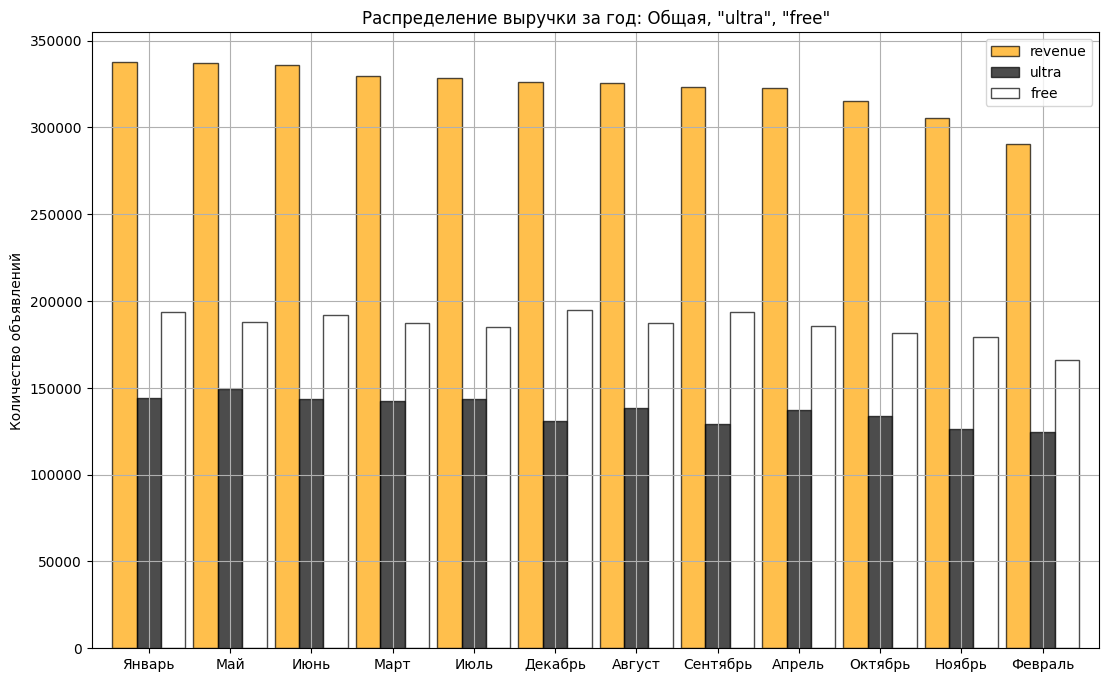

In [40]:
# создадим столбчатую диаграмму

per_month_m_go.plot(
    kind='bar',
    figsize=(13,8),
    grid=True,
    width=0.9,
    color= ['orange', 'black', 'white'],
    alpha=0.7,
    edgecolor='black'
)
plt.title(f'Распределение выручки за год: Общая, "ultra", "free"')
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylabel('Количество объявлений')
plt.show()

plt.show()

In [41]:
print('Общая прибыль за год составляет:', per_month_go.groupby('month')['revenue'].sum().sum())
print()

Общая прибыль за год составляет: 3878641



Вывод: 

Большая часть выручки приходится на пользователей, не использующих подписку 'ultra'. 

Самые прибыльные месяцы оказались: Январь, Май, Июнь

Самые слабые месяцы по доходам оказались: Октябрь, Ноябрь и Февраль.

# 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

## 6.1 Тратят ли пользователи с подпиской больше времени на поездки? 

Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу используя исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Воспользуемся исходными данными и составим нулевую и альтернативную гипотезы:
1. **Нулевая гипотеза H0**. Среднее время поездок с подпиской `ultra` и без подписки равны.
2. **Альтернативная гипотеза H1**. Среднее время поездок с подпиской `ultra` выше, чем без подписки.

Проверим гипотезы:

In [42]:
# расчитаем дисперсии времени поездок с подпиской и без
mean_duration_ultra = merged_ultra['duration'].mean()
variance_ultra = ((merged_ultra['duration'] - mean_duration_ultra) ** 2).mean()

ultra_var = ((merged_ultra['duration'] - merged_ultra['duration'].mean()) **2).mean()

free_var = ((merged_free['duration'] - merged_free['duration'].mean()) **2).mean()

print(f' Дисперсия времени поездок с подпиской "ultra" = {ultra_var.round(3)}')
print(f' Дисперсия времени поездок без подписки "free" = {free_var.round(3)}')
print(f' Количество поездок с подпиской "ultra" = {merged_ultra.shape[0]}')
print(f' Количество поездок без подписки "free" = {merged_free.shape[0]}')

 Дисперсия времени поездок с подпиской "ultra" = 31.103
 Дисперсия времени поездок без подписки "free" = 40.069
 Количество поездок с подпиской "ultra" = 6500
 Количество поездок без подписки "free" = 11568


По-моему мнению, разница в количестве поездок, а также дисперсии длительности поездок между двумя видами подписок отличаются достаточно, чтобы применить дополнительный параметр `equal_var=False`

In [43]:
# задаём уровень статистической значимости
alpha = 0.05

# проведем статистический тест
results = st.ttest_ind(merged_ultra['duration'], 
                     merged_free['duration'], 
                     equal_var=False, 
                     alternative='greater'
)

# выведем на экран получившееся p-значение
print(results.pvalue)

# сравним получившееся p-значение с уровнем стат. значимости
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1814679253701353e-36
Отвергаем нулевую гипотезу


Вывод: 

При проверке гипотезы мы нашли p-значение, которое оказалось очень мало. В таком случае мы можем сказать, что нулевая гипотеза должна быть отклонена. Вероятно, что среднее время поездок с подпиской `ultra` выше, чем в поездках без подписки.

## 6.2 Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Проверим гипотезу и сделаем выводы.

Воспользуемся исходными данными и составим нулевую и альтернативную гипотезы:

1. **Нулевая гипотеза H0**. Среднее расстояние поездок с подпиской ultra равно 3130 метрам.
2. **Альтернативная гипотеза H1**. Среднее расстояние поездок с подпиской ultra более 3130 метров.

Проверим гипотезы:

In [44]:
# задаём уровень статистической значимости
alpha = 0.05
distance = 3130

# проведем статистический тест
results = st.ttest_1samp(merged_ultra['distance'], 
                     distance, 
                     alternative='greater'
)

# выведем на экран получившееся p-значение
print(results.pvalue)

# сравним получившееся p-значение с уровнем стат. значимости
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


Вывод:

Найденое p-значение оказалось выше, чем уровень статистической значимости. Среднее расстояние, которое проезжают пользователи с подпиской `ultra` за одну поездку, вероятно, не превышает 3130 метров. 

## 6.3 Гипотеза о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Воспользуемся исходными данными и составим нулевую и альтернативную гипотезы:

1. **Нулевая гипотеза H0**. Помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки.
2. **Альтернативная гипотеза H1**. Помесячная выручка от пользователей с подпиской `ultra` выше выручки от пользователей без подписки.

Проверим гипотезы:

In [45]:
# подсчитаем помесячную выручку 
ultra_users = per_month_go[per_month_go['subscription_fee'] > 0]['revenue']
free_users = per_month_go[per_month_go['subscription_fee'] == 0]['revenue']

# задаём уровень статистической значимости
alpha = 0.05

# проведем статистический тест
results = st.ttest_ind(ultra_users, free_users, alternative = 'greater')

# выведем на экран получившееся p-значение
print(results.pvalue)

# сравним получившееся p-значение с уровнем стат. значимости
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Вывод:

Полученое p-значение оказалось ниже, чем уровень стат. значимости. В таком случае мы отвергаем нулевую гипотезу о том, что помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки. Вероятно выручка от пользователей с подпиской больше, чем от пользователей без подписки.


## 6.4 Проверка гипотезы о снижении количества обращений в техподдержку.

Представьте ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 

Какой тест вам понадобился бы для проверки этой гипотезы?

В данном случае, мы имеем дело с парными выборками - количество обращений в техподдержку для пользователя до и после обновления серверов. Для проверки гипотезы о том, что обновление серверов привело к снижению количества обращений, мы можем использовать t-тест для зависимых(парных) выборок.

В библиотеке scipy соответствующая функция называется `scipy.stats.ttest_rel()`.

Вот как можно было бы сформулировать нулевую и альтернативную гипотезы:

1. **Нулевая гипотеза H0**: Среднее количество обращений в техподдержку до и после обновления серверов одинаково.
2. **Альтернативная гипотеза H1**: Среднее количество обращений в техподдержку после обновления серверов меньше, чем до обновления.


Код для проведения t-теста может выглядеть следующим образом:

In [46]:
before = "количество обращений до"
after = "количество обращений после"

# зададим уровень стат. значимости
alpha = 0.05

# проведение t-теста
results = st.ttest_rel(before, after) 

# выведем полученное p-значение
print('p-значение:', results.pvalue)

# проверим p-value
alpha = 0.05  # задаем уровень значимости

if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U26'), dtype('<U26')) -> dtype('<U26')

Общий вывод:
 
 1. На первом шаге: 
 - Загрузили все .csv файлы с данными
 - Подключили все необходимые библиотеки Python'a
 - Была выведена информация касательно каждой из таблиц, базовые гистаграммы и описательная статистика.
 - Таким образом мы ознакомились с данными, которые нам предстоит обработать и изучить
 2. На предобработке данных:
 - Проверили датафреймы на наличие дубликатов, и удалили их.
 - Привели столбцы в корректные форматы, а также привели числовые столбцы в более компактные с точки зрения памяти виды.
 - Там, где необходимо, значения столбцов были округлены.
 3. Исследовательский анализ данных показал нам:
 - Средний возраст пользователя - 25 лет
 - Стандартное отклонение пользователей - 4.6, разброс небольшой.
 - Больше всего путешествуют на самокатах в Пятигорске, тогда как в Москве - меньше всего
 - Пользователей с подпиской - 699, что 45.6% от общего числа пользователей. Тогда как пользователей без подписки - 835, что есть 54.4% от общего числа пользователей.
 - В среднем пользователь проезжает 3 километра за поездку. Но есть и отдельное небольшое распределение для коротких поездок - в среднем в таких поездках расстояние лишь 700 метров.
 - Самые короткие поездки занимают около минуты, тогда как самые долгие поездки достигают 41 минуты. А в среднем на самокате проезжают по 18 минут.
 4. В объединении данных:
 - Объединили данные о пользователях, поездках и подписках в один датафрейм, а также провели различного типа проверки для того, чтобы удостовериться в корректности новых данных.
 - Были созданы отдельные датафреймы - для пользователей с подпиской и без
 - Пользователи без подписки любят менее длительные поездки, чем пользователи с подпиской
 - В среднем пользователя с подпиской и без подписки проезжают 3.1 и 3 км соответственно. Наличие подписки практически не влияет на среднее значение.
 - Визуализировали информацию о расстоянии и длительности поездок для пользователей с подпиской и без.
 5. В подсчёте выручки:
 - Создали сводную таблицу, в которой содержится информация о суммарном растоянии, количестве поездок и суммарном времени. В неё же добавили столбец с помесячной выручкой.
 - Была создана таблица с помесячной прибылью с поездок в зависимости от типа подписки - а также выведена общая прибыль за год - 3,878,641.00 рублей
 - Большая часть выручки приходится на пользователей, не использующих подписку 'ultra'.
 - Самые прибыльные месяцы оказались: Январь, Май, Июнь
 - Самые низкие месяцы по доходам оказались: Октябрь, Ноябрь и Февраль.
 6. Были проверены гипотезы:
 - О том, тратят ли пользователя с подпиской больше времени на поездки - при уровне статистической значимости в 5% нулевая гипотеза о том, что средние равны отвергнута. Среднее время поездок с подпиской выше, чем без подписки, хотя и незначительно, судя по гистограммам.
 - О том, что среднее расстояние за одну поездку не превышает 3130 метров - нулевую гипотезу не получилось отвергнуть. Это говорит о том, что есть вероятность, что среднее расстояние действительно не превышает 3130 метров, при статистической значимости в 5%
 - О том, что помесячная выручка от пользователей с подпиской по месяцам выше, чем без - нулевая гипотеза отвергнута. Средняя месячная выручка от пользователей с подпиской больше средней месячной выручки от пользователей без подписки, но при установленном уровне значимости в 5%. Гистограмма в пункте 5 говорит об обратном. 
 - О нахождении корректного теста для проверки гипотезы о снижении количества обращений в техподдержку - поскольку речь идет о парных выборках, мы можем использовать t-тест для парных выборок. В библиотеке scipy есть соответствующая функция под названием scipy.stats.ttest_rel(). Был написан код, который может решить подобную гипотезу, если будут необходимые данные.